<a href="https://colab.research.google.com/github/armitakar/GGS366_Spatial_Computing/blob/main/Lectures/5_2_Spatial_data_Introduction_to_Geopandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*GeoPandas is a project to add support for geographic data to pandas objects. It currently implements GeoSeries and GeoDataFrame types which are subclasses of pandas.Series and pandas.DataFrame respectively.*

See the Git repo for more information: https://github.com/geopandas/geopandas

The key difference between Pandas and GeoPandas is that GeoPandas includes a geometry column in its DataFrame, which allows it to store spatial data as one or multiple coordinate pairs (e.g., latitude and longitude), enabling spatial operations and geographic analysis.


We will get started with importing the Pandas and GeoPandas library.

In [ ]:
import pandas as pd
import geopandas as gpd

In this lecture, we will be heavily using administrative boundaries such as state, county, census tract, and block groups, often organized by their **FIPS codes**.

Here's a basic structure of FIPS codes used for different administrative boundaries:


![image](https://drive.google.com/uc?export=view&id=1RBFiGGqTQtzRxbi6gfeeEMc4gxFEB9tU)

Concatenating various levels of FIPS codes, we get the GEOID.

# Importing shapefile

We can read geospatial data using the **.read_file()** function, which supports various file formats, including shapefiles, GeoJSON, and GeoPackage.

For this example, we will use a shapefile, but you can explore how to import other geospatial formats as well. While it's possible to load data from your local machine using the files module, as we did in the previous lecture, here we will directly read a **Virginia census tracts shapefile** from the [TIGER/Line Shapefiles page](https://www.census.gov/geographies/mapping-files/time-series/geo/tiger-line-file.html).

In this way, we can work with publicly available geospatial data without needing to download files manually.

In [ ]:
# Access shapefile of Virginia census tracts
# the FIPS code for virginia is 51, you may change this for other states
va_tract = gpd.read_file("https://www2.census.gov/geo/tiger/TIGER2022/TRACT/tl_2022_51_tract.zip")

We can use the basic single color plot to take a quick look at the data we just downloaded. We will learn more about mapping in the upcoming classes.

<Axes: >

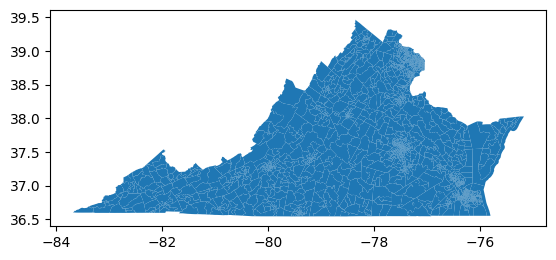

In [ ]:
# Basic single color plot
va_tract.plot()

As mentioned earlier, the main difference between Pandas and GeoPandas lies in the presence of a geometry column in GeoPandas. Otherwise, all standard Pandas functions are fully compatible with GeoPandas. For example, we can use common data exploration functions such as head() to preview the first few rows and shape to check the number of rows and columns in a GeoDataFrame, just as we would in a regular Pandas DataFrame.

In [ ]:
va_tract.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,51,013,101502,51013101502,1015.02,Census Tract 1015.02,G5020,S,635955,0,+38.8907435,-077.0928398,"POLYGON ((-77.10057 38.88762, -77.10039 38.887..."
1,51,013,101804,51013101804,1018.04,Census Tract 1018.04,G5020,S,195431,0,+38.8866986,-077.0879512,"POLYGON ((-77.09069 38.88963, -77.09048 38.889..."
2,51,013,101705,51013101705,1017.05,Census Tract 1017.05,G5020,S,282555,0,+38.8927606,-077.0755724,"POLYGON ((-77.08027 38.89324, -77.07986 38.893..."
3,51,013,101704,51013101704,1017.04,Census Tract 1017.04,G5020,S,99908,0,+38.8928523,-077.0696004,"POLYGON ((-77.07151 38.89249, -77.07147 38.892..."
4,51,013,103505,51013103505,1035.05,Census Tract 1035.05,G5020,S,538888,0,+38.8613937,-077.0598298,"POLYGON ((-77.06371 38.86277, -77.0637 38.8629..."


In [ ]:
va_tract.shape

(2198, 13)

# Coordinate Reference Systems (CRS)

GeoPandas can automatically store the Coordinate Reference System (CRS) as an attribute when loading spatial objects. These objects can then be transformed to a different CRS using the .to_crs() method.

There are two main types of Coordinate Reference Systems (CRS):

- **Geographic Coordinate System (GCS):**
  - A GCS measures locations on Earth using latitude and longitude, based on a spherical or ellipsoidal model of the Earth.
  - Latitude is measured in degrees north or south of the equator.
  - Longitude is measured in degrees east or west of the prime meridian.
  - Example: The World Geodetic System (WGS84) (EPSG:4326) is one of the most widely used geographic coordinate systems.

- **Projected Coordinate System (PCS):**
  - A PCS transforms the 3D surface of the Earth onto a 2D flat plane and measures locations using Cartesian coordinates (x, y).
  - The location coordinates are typically measured in meters or feet.
  - Examples: The Universal Transverse Mercator (UTM) and WGS 84 Pseudo-Mercator (EPSG:3857) are common projected coordinate systems.

There are hundreds of different CRS types, each suited to different geographic regions to maintain consistency and accuracy in measurements. For instance, while WGS84 (EPSG:4326) and North American Datum of 1983 (NAD83) (EPSG:4269) are both geographic coordinate systems, NAD83 is more appropriate for the United States. This is because NAD83 is specifically designed to minimize errors in mapping and positioning within North America, taking into account the local shape and size of the Earth in this region, while WGS84 is globally used but has slight inaccuracies in some local areas.

We can easily check the current CRS of our data using the .crs function, as follows.

In [ ]:
# current crs of the data
va_tract.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

With GeoPandas, we can change the Coordinate Reference System (CRS) using the **.to_crs()** function. For example, our the data is currently in a geographic coordinate system like **North American Datum 1983 (NAD83) (EPSG: 4269)**, which is measured in **decimal degrees**, we can transform it into **a projected coordinate system such as EPSG: 3857**, which is measured in **meters**. See how the geometry values have changed after this conversion.

In [ ]:
va_tract.to_crs(epsg = 3857)

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,51,013,101502,51013101502,1015.02,Census Tract 1015.02,G5020,S,635955,0,+38.8907435,-077.0928398,"POLYGON ((-8582796.415 4705587.434, -8582776.0..."
1,51,013,101804,51013101804,1018.04,Census Tract 1018.04,G5020,S,195431,0,+38.8866986,-077.0879512,"POLYGON ((-8581695.91 4705874.325, -8581673.20..."
2,51,013,101705,51013101705,1017.05,Census Tract 1017.05,G5020,S,282555,0,+38.8927606,-077.0755724,"POLYGON ((-8580536.741 4706391.065, -8580490.2..."
3,51,013,101704,51013101704,1017.04,Census Tract 1017.04,G5020,S,99908,0,+38.8928523,-077.0696004,"POLYGON ((-8579561.248 4706283.081, -8579556.3..."
4,51,013,103505,51013103505,1035.05,Census Tract 1035.05,G5020,S,538888,0,+38.8613937,-077.0598298,"POLYGON ((-8578692.733 4702034.001, -8578691.3..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2193,51,165,010600,51165010600,106,Census Tract 106,G5020,S,91078253,234708,+38.5164322,-078.8525662,"POLYGON ((-8787712.332 4651636.293, -8787656.5..."
2194,51,165,011700,51165011700,117,Census Tract 117,G5020,S,45806005,468336,+38.3676178,-078.8964855,"POLYGON ((-8786872.426 4627804.123, -8786871.0..."
2195,51,165,010700,51165010700,107,Census Tract 107,G5020,S,81990253,257288,+38.5880235,-078.8719806,"POLYGON ((-8788700.96 4659250.47, -8788699.513..."
2196,51,165,010400,51165010400,104,Census Tract 104,G5020,S,110603698,434809,+38.5503609,-078.7168103,"POLYGON ((-8772458.89 4655037.161, -8772419.81..."


We can then easily find the area of a set of geometry polygons, such as the shapes we have here, via the **.area** function.

In [ ]:
# Finding the area of polygons
va_tract['area_km2'] = va_tract['geometry'].area / 1e6
va_tract.head()

<ipython-input-8-923f735b9c17>:2: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  va_tract['area_km2'] = va_tract['geometry'].area / 1e6


,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,area_km2
0,51,013,101502,51013101502,1015.02,Census Tract 1015.02,G5020,S,635955,0,+38.8907435,-077.0928398,"POLYGON ((-77.10057 38.88762, -77.10039 38.887...",6.602912e-11
1,51,013,101804,51013101804,1018.04,Census Tract 1018.04,G5020,S,195431,0,+38.8866986,-077.0879512,"POLYGON ((-77.09069 38.88963, -77.09048 38.889...",2.028987e-11
2,51,013,101705,51013101705,1017.05,Census Tract 1017.05,G5020,S,282555,0,+38.8927606,-077.0755724,"POLYGON ((-77.08027 38.89324, -77.07986 38.893...",2.933758e-11
3,51,013,101704,51013101704,1017.04,Census Tract 1017.04,G5020,S,99908,0,+38.8928523,-077.0696004,"POLYGON ((-77.07151 38.89249, -77.07147 38.892...",1.037361e-11
4,51,013,103505,51013103505,1035.05,Census Tract 1035.05,G5020,S,538888,0,+38.8613937,-077.0598298,"POLYGON ((-77.06371 38.86277, -77.0637 38.8629...",5.592813e-11


# Census data

We can extract census data to obtain additional socio-economic information about these census tracts. Census data is available in various forms, such as the Decennial Survey, American Community Survey (ACS) 5-Year Estimates, ACS 1-Year Estimates, and more. For this exercise, we will focus on the ACS 5-Year Estimates dataset.

Using FIPS codes, you can identify specific regions within the dataset and filter the data accordingly.

First we need to **install and load the census library**.

In [ ]:
# Installing the library
!pip install census

In [ ]:
# loading census library
from census import Census

The census library needs an API key to function. You can request the API keys from here: https://api.census.gov/data/key_signup.html

In [ ]:
# Set API key
c = Census("Insert_your_API_key_here")


Next, you can use the following functions to extract census tract-specific information for a particular state and county. Census data contains information on many variables, and these variables are represented by coded names. You can find a list of these variable codes and their detailed descriptions at this link: https://api.census.gov/data/2022/acs/acs5/variables.html

In addition, there are other functions available to extract state-level, county-level, blockgroup-level data. You can explore these functions further in the Census Python package documentation: https://pypi.org/project/census/

In [ ]:
#B01001_001E: total population, B01001_002E: total male population, and B01001_026E: total female population
# 51 is FIPS code for Virginia
# * sign to extract all data for all County and tracts
# ACS 5-Year Survey for the year 2022
va_census = c.acs5.state_county_tract(fields = ('NAME', "B01001_001E", "B01001_002E", "B01001_026E"),
                                      state_fips = "51",
                                      county_fips = "*",
                                      tract = "*", year = 2022)

The data is extracted in a **list of dictionaries** format.

In [ ]:
va_census

[{'NAME': 'Census Tract 901.01; Accomack County; Virginia',
  'B01001_001E': 1902.0,
  'B01001_002E': 996.0,
  'B01001_026E': 906.0,
  'state': '51',
  'county': '001',
  'tract': '090101'},
 {'NAME': 'Census Tract 901.02; Accomack County; Virginia',
  'B01001_001E': 1401.0,
  'B01001_002E': 773.0,
  'B01001_026E': 628.0,
  'state': '51',
  'county': '001',
  'tract': '090102'},
 {'NAME': 'Census Tract 902.01; Accomack County; Virginia',
  'B01001_001E': 3126.0,
  'B01001_002E': 1507.0,
  'B01001_026E': 1619.0,
  'state': '51',
  'county': '001',
  'tract': '090201'},
 {'NAME': 'Census Tract 902.02; Accomack County; Virginia',
  'B01001_001E': 2772.0,
  'B01001_002E': 1193.0,
  'B01001_026E': 1579.0,
  'state': '51',
  'county': '001',
  'tract': '090202'},
 {'NAME': 'Census Tract 903; Accomack County; Virginia',
  'B01001_001E': 2225.0,
  'B01001_002E': 1159.0,
  'B01001_026E': 1066.0,
  'state': '51',
  'county': '001',
  'tract': '090300'},
 {'NAME': 'Census Tract 904.01; Accomack C

We can **convert it to a pandas dataframe** using the following code.

In [ ]:
va_df = pd.DataFrame(va_census)
va_df

,NAME,B01001_001E,B01001_002E,B01001_026E,state,county,tract
0,Census Tract 901.01; Accomack County; Virginia,1902.0,996.0,906.0,51,001,090101
1,Census Tract 901.02; Accomack County; Virginia,1401.0,773.0,628.0,51,001,090102
2,Census Tract 902.01; Accomack County; Virginia,3126.0,1507.0,1619.0,51,001,090201
3,Census Tract 902.02; Accomack County; Virginia,2772.0,1193.0,1579.0,51,001,090202
4,Census Tract 903; Accomack County; Virginia,2225.0,1159.0,1066.0,51,001,090300
...,...,...,...,...,...,...,...
2193,Census Tract 1.02; Winchester city; Virginia,3510.0,1690.0,1820.0,51,840,000102
2194,Census Tract 2.01; Winchester city; Virginia,3697.0,1864.0,1833.0,51,840,000201
2195,Census Tract 2.02; Winchester city; Virginia,5598.0,2453.0,3145.0,51,840,000202
2196,Census Tract 3.01; Winchester city; Virginia,5388.0,2659.0,2729.0,51,840,000301


You can **rename the variable names** to make it more self-explanatory.

In [ ]:
va_df = va_df.rename(columns = {"B01001_001E": "Total_Population", "B01001_002E": "Male_Population", "B01001_026E": "Female_Population"})
va_df

,NAME,Total_Population,Male_Population,Female_Population,state,county,tract
0,Census Tract 901.01; Accomack County; Virginia,1902.0,996.0,906.0,51,001,090101
1,Census Tract 901.02; Accomack County; Virginia,1401.0,773.0,628.0,51,001,090102
2,Census Tract 902.01; Accomack County; Virginia,3126.0,1507.0,1619.0,51,001,090201
3,Census Tract 902.02; Accomack County; Virginia,2772.0,1193.0,1579.0,51,001,090202
4,Census Tract 903; Accomack County; Virginia,2225.0,1159.0,1066.0,51,001,090300
...,...,...,...,...,...,...,...
2193,Census Tract 1.02; Winchester city; Virginia,3510.0,1690.0,1820.0,51,840,000102
2194,Census Tract 2.01; Winchester city; Virginia,3697.0,1864.0,1833.0,51,840,000201
2195,Census Tract 2.02; Winchester city; Virginia,5598.0,2453.0,3145.0,51,840,000202
2196,Census Tract 3.01; Winchester city; Virginia,5388.0,2659.0,2729.0,51,840,000301


# Data merging

DataFrames can be merged between Pandas and GeoPandas, or between two Pandas or GeoPandas datasets. For example, we can merge the va_tract GeoDataFrame with the va_df DataFrame using the **merge()** function.

This function requires **one or more common key(s) (column names)** in both datasets to perform the merge. Additionally, the how parameter specifies the type of join operation, such as **left, right, or inner join**. You can learn more about merge operations and their options here: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html

In [ ]:
va_tract.columns

Index(['STATEFP', 'COUNTYFP', 'TRACTCE', 'GEOID', 'NAME', 'NAMELSAD', 'MTFCC',
       'FUNCSTAT', 'ALAND', 'AWATER', 'INTPTLAT', 'INTPTLON', 'geometry',
       'area_km2'],
      dtype='object')

In [ ]:
va_df.columns

Index(['NAME', 'Total_Population', 'Male_Population', 'Female_Population',
       'state', 'county', 'tract'],
      dtype='object')

In [ ]:
# using both county and tract information as key because there might be the same tract number in different counties
VA_merged = pd.merge(va_df, va_tract, left_on=["county", "tract"], right_on = ["COUNTYFP", "TRACTCE"], how = "inner")
VA_merged.head()


,NAME_x,Total_Population,Male_Population,Female_Population,state,county,tract,STATEFP,COUNTYFP,TRACTCE,...,NAME_y,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,area_km2
0,Census Tract 901.01; Accomack County; Virginia,1902.0,996.0,906.0,51,001,090101,51,001,090101,...,901.01,Census Tract 901.01,G5020,S,11889599,32123347,+37.9584297,-075.3437520,"POLYGON ((-75.41176 37.94633, -75.38947 37.963...",4.511969e-09
1,Census Tract 901.02; Accomack County; Virginia,1401.0,773.0,628.0,51,001,090102,51,001,090102,...,901.02,Census Tract 901.02,G5020,S,6652973,5791517,+37.9084048,-075.3953862,"POLYGON ((-75.42392 37.89824, -75.42371 37.898...",1.274901e-09
2,Census Tract 902.01; Accomack County; Virginia,3126.0,1507.0,1619.0,51,001,090201,51,001,090201,...,902.01,Census Tract 902.01,G5020,S,67750622,33782725,+37.9744866,-075.4361713,"POLYGON ((-75.5403 37.94601, -75.53994 37.9467...",1.041166e-08
3,Census Tract 902.02; Accomack County; Virginia,2772.0,1193.0,1579.0,51,001,090202,51,001,090202,...,902.02,Census Tract 902.02,G5020,S,120052501,2763533,+37.9373260,-075.5614807,"POLYGON ((-75.64823 37.96677, -75.64742 37.967...",1.258712e-08
4,Census Tract 903; Accomack County; Virginia,2225.0,1159.0,1066.0,51,001,090300,51,001,090300,...,903,Census Tract 903,G5020,S,128419397,61780185,+37.8876208,-075.6629073,"POLYGON ((-75.78396 37.92491, -75.76164 37.941...",1.948255e-08


We can select a **subset of columns** necessary for further analysis.

In [ ]:
# columns in the merged data
VA_merged.columns

Index(['NAME_x', 'Total_Population', 'Male_Population', 'Female_Population',
       'state', 'county', 'tract', 'STATEFP', 'COUNTYFP', 'TRACTCE', 'GEOID',
       'NAME_y', 'NAMELSAD', 'MTFCC', 'FUNCSTAT', 'ALAND', 'AWATER',
       'INTPTLAT', 'INTPTLON', 'geometry', 'area_km2'],
      dtype='object')

In [ ]:
# selecting subset of columns
VA_merged1 = VA_merged[['STATEFP', 'COUNTYFP', 'TRACTCE', 'GEOID', 'Total_Population', 'Male_Population',
       'Female_Population', 'geometry']]
VA_merged1

,STATEFP,COUNTYFP,TRACTCE,GEOID,Total_Population,Male_Population,Female_Population,geometry
0,51,001,090101,51001090101,1902.0,996.0,906.0,"POLYGON ((-75.41176 37.94633, -75.38947 37.963..."
1,51,001,090102,51001090102,1401.0,773.0,628.0,"POLYGON ((-75.42392 37.89824, -75.42371 37.898..."
2,51,001,090201,51001090201,3126.0,1507.0,1619.0,"POLYGON ((-75.5403 37.94601, -75.53994 37.9467..."
3,51,001,090202,51001090202,2772.0,1193.0,1579.0,"POLYGON ((-75.64823 37.96677, -75.64742 37.967..."
4,51,001,090300,51001090300,2225.0,1159.0,1066.0,"POLYGON ((-75.78396 37.92491, -75.76164 37.941..."
...,...,...,...,...,...,...,...,...
2193,51,840,000102,51840000102,3510.0,1690.0,1820.0,"POLYGON ((-78.16623 39.1825, -78.16611 39.1828..."
2194,51,840,000201,51840000201,3697.0,1864.0,1833.0,"POLYGON ((-78.19726 39.19114, -78.19711 39.191..."
2195,51,840,000202,51840000202,5598.0,2453.0,3145.0,"POLYGON ((-78.2005 39.18016, -78.20045 39.1802..."
2196,51,840,000301,51840000301,5388.0,2659.0,2729.0,"POLYGON ((-78.18103 39.16647, -78.18063 39.167..."


You can apply additional functions, such as generating summary statistics or estimating new columns, in the same way as we did with other DataFrames.

In [ ]:
# calculating percentage of male population
VA_merged1['Male_Population_pct'] = VA_merged1['Male_Population'] *100 / VA_merged1['Total_Population']
# calculating percentage of female population
VA_merged1['Female_Population_pct'] = VA_merged1['Female_Population'] *100 / VA_merged1['Total_Population']
VA_merged1

<ipython-input-21-1585b02c41f1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  VA_merged1['Male_Population_pct'] = VA_merged1['Male_Population'] *100 / VA_merged1['Total_Population']
<ipython-input-21-1585b02c41f1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  VA_merged1['Female_Population_pct'] = VA_merged1['Female_Population'] *100 / VA_merged1['Total_Population']


,STATEFP,COUNTYFP,TRACTCE,GEOID,Total_Population,Male_Population,Female_Population,geometry,Male_Population_pct,Female_Population_pct
0,51,001,090101,51001090101,1902.0,996.0,906.0,"POLYGON ((-75.41176 37.94633, -75.38947 37.963...",52.365931,47.634069
1,51,001,090102,51001090102,1401.0,773.0,628.0,"POLYGON ((-75.42392 37.89824, -75.42371 37.898...",55.174875,44.825125
2,51,001,090201,51001090201,3126.0,1507.0,1619.0,"POLYGON ((-75.5403 37.94601, -75.53994 37.9467...",48.208573,51.791427
3,51,001,090202,51001090202,2772.0,1193.0,1579.0,"POLYGON ((-75.64823 37.96677, -75.64742 37.967...",43.037518,56.962482
4,51,001,090300,51001090300,2225.0,1159.0,1066.0,"POLYGON ((-75.78396 37.92491, -75.76164 37.941...",52.089888,47.910112
...,...,...,...,...,...,...,...,...,...,...
2193,51,840,000102,51840000102,3510.0,1690.0,1820.0,"POLYGON ((-78.16623 39.1825, -78.16611 39.1828...",48.148148,51.851852
2194,51,840,000201,51840000201,3697.0,1864.0,1833.0,"POLYGON ((-78.19726 39.19114, -78.19711 39.191...",50.419259,49.580741
2195,51,840,000202,51840000202,5598.0,2453.0,3145.0,"POLYGON ((-78.2005 39.18016, -78.20045 39.1802...",43.819221,56.180779
2196,51,840,000301,51840000301,5388.0,2659.0,2729.0,"POLYGON ((-78.18103 39.16647, -78.18063 39.167...",49.350408,50.649592


In [ ]:
# estimating average male population percentage by counties
VA_merged1_summary = VA_merged1.groupby('COUNTYFP')['Male_Population_pct'].mean().reset_index()
VA_merged1_summary

,COUNTYFP,Male_Population_pct
0,001,53.271459
1,003,47.735393
2,005,49.903405
3,007,49.637388
4,009,47.747739
...,...,...
128,800,48.930928
129,810,49.530959
130,820,49.929436
131,830,48.425211


# Exporting the shapefile

Notice that after performing Pandas operations, the merged file has become a Pandas DataFrame object. To export it as a shapefile, we first need to **convert it back to a GeoPandas object**. Make sure to set the correct CRS (Coordinate Reference System).

Additionally, shapefiles consist of multiple files, so we will first **create a folder** to hold them using **!mkdir**. Then, we will export the data using the **.to_file()** function.



In [ ]:
type(VA_merged1)

pandas.core.frame.DataFrame

In [ ]:
# convert to geodataframe
VA_merged1 = gpd.GeoDataFrame(VA_merged1, geometry='geometry', crs="EPSG:3857")
# create folder named VA_tract_population_dat
!mkdir VA_tract_population_dat
# export shapefile
VA_merged1.to_file(r'VA_tract_population_dat/VA_tract_population_dat.shp')

mkdir: cannot create directory ‘VA_tract_population_dat’: File exists


<ipython-input-24-e79e0d0553d5>:6: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  VA_merged1.to_file(r'VA_tract_population_dat/VA_tract_population_dat.shp')
/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'Total_Population' to 'Total_Popu'
  ogr_write(
/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'Male_Population' to 'Male_Popul'
  ogr_write(
/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'Female_Population' to 'Female_Pop'
  ogr_write(
/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'Male_Population_pct' to 'Male_Pop_1'
  ogr_write(
/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'Female_Population_pct' to 'Female_P_1'
  ogr_wr